In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Data/CSV_TUFF_DOS_112.csv')
# df = df.rename(columns={'Time (s)': 't', 'Temperature (C)': 'Tm', 'Tension': 'Tn', 'Pressure': 'p', 'Altitude': 'z',
#                        'AccelerationX': 'ax', 'AccelerationY': 'ay', 'AccelerationZ': 'az', 'MagnometerX': 'mx',
#                        'MagnometerY': 'my', 'MagnometerZ': 'mz'})

df = df.rename(columns={'Time': 'Time (s)', 'Temperature': 'Temperature (C)', 'Tension': 'Tension (N)',
                        'Pressure': 'Pressure (hPa)', 'Altitude': 'Altitude (km)',
                       'AccelerationX': 'ax', 'AccelerationY': 'ay',
                        'AccelerationZ': 'az', 'MagnometerX': 'mx',
                       'MagnometerY': 'my', 'MagnometerZ': 'mz'})

df['Tension (N)'][df['Tension (N)'] < 0] = np.nan
# df['Tension (N)'].replace(0, np.nan, inplace=True)
df['AngleX'].replace(0, np.nan, inplace=True)
df['AngleY'].replace(0, np.nan, inplace=True)
df['AngleZ'].replace(0, np.nan, inplace=True)
df['ax'].replace(0, np.nan, inplace=True)
df['ay'].replace(0, np.nan, inplace=True)
df['az'].replace(0, np.nan, inplace=True)
df['mz'].replace(0, np.nan, inplace=True)

df['Time (s)'] -= df['Time (s)'][0]
df['Pressure (hPa)'] /= 100
df

C:\Users\aspen\AppData\Local\Temp\ipykernel_32036\1122668113.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tension (N)'][df['Tension (N)'] < 0] = np.nan


,Unnamed: 0,Time (s),Tension (N),Temperature (C),Pressure (hPa),Altitude (km),AngleX,AngleY,AngleZ,ax,ay,az,mx,my,mz,Average_tension,Drag
0,328599,0.000000,4.638558,32.37,994.6479,620.570886,155.50,-2.19,-179.56,-1.27,-0.68,-10.93,13.56,-22.69,50.69,NaN,0.809658
1,328600,0.022727,5.984871,32.37,994.6228,621.259862,147.44,-2.00,-179.31,-1.49,-0.18,-12.79,16.19,-20.50,50.69,NaN,2.155971
2,328601,0.045455,6.064065,32.37,994.6228,621.259862,NaN,NaN,NaN,NaN,NaN,NaN,16.19,-20.50,50.69,NaN,2.235165
3,328602,0.068182,6.041438,32.37,994.6228,621.259862,144.56,-2.00,-179.50,-1.38,-0.37,-11.76,17.25,-20.37,50.25,NaN,2.212538
4,328603,0.090909,5.916989,32.37,994.5725,622.637815,142.63,-1.88,-179.50,-1.17,-0.22,-12.31,17.25,-20.37,50.25,NaN,2.088089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249361,577960,6225.001843,0.101822,2.03,989.0947,774.770366,352.50,-22.44,-179.94,-0.94,-0.32,-9.90,11.38,26.75,49.56,3.717838,3.727078
249362,577961,6225.028870,0.090508,2.03,989.0947,774.770366,352.88,-22.69,-179.63,-0.95,-0.39,-9.65,13.56,24.87,50.38,3.709421,3.738392
249363,577962,6225.055897,0.079195,2.03,989.1167,774.179815,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,3.701343,3.749705
249364,577963,6225.082924,0.067881,2.03,989.1167,774.179815,353.25,-23.06,-179.31,-0.97,-0.53,-9.30,13.56,24.87,50.38,3.693355,3.761019


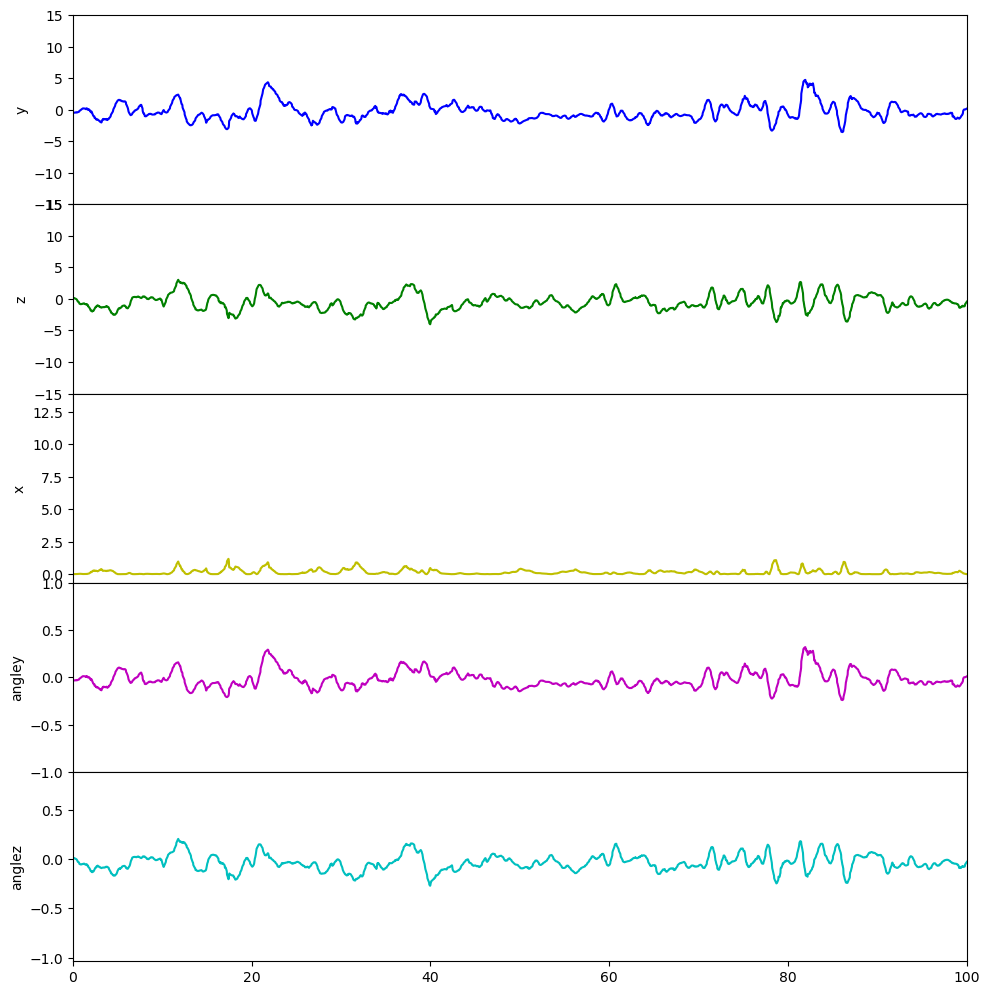

In [42]:
L = 15
t = 'Time (s)'
y2 = 'AngleX'
y3 = 'AngleY'
y4 = 'AngleZ'

arr1 = np.array(df[y2]).astype(np.double)
arr2 = np.array(df[y3]).astype(np.double)
arr3 = np.array(df[y4]).astype(np.double)
mask = (np.isfinite(arr1) & np.isfinite(arr2) & np.isfinite(arr3))

t = df[t][mask]

# y = y.reset_index().to_numpy()
# z = z.reset_index().to_numpy()
anglex = df[y2][mask]*np.pi/180
angley = df[y3][mask]*np.pi/180
anglez = df[y4][mask]*np.pi/180

anglez = np.where(anglez < 0, anglez + 2*np.pi, anglez)

# angley = (angley - angley.mean())
# anglez = (anglez - anglez.mean())
anglez = (anglez - np.pi)

# for i,a in enumerate(anglex):
    
y = L*np.sin(angley)
y = y.to_numpy()
z = L*np.sin(anglez)
# z = z.reset_index().to_numpy()
x = L*(1-np.cos(angley+anglez))

plt.rcParams['figure.figsize'] = (10,10)
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharex=True)


ax1.plot(t, y, 'b')
ax1.set_ylabel('y')

# ax2 = ax1.twinx()
ax2.plot(t, z, 'g')
ax2.set_ylabel('z')

# ax3 = ax1.sharex()
ax3.plot(t, x, 'y')
ax3.set_ylabel('x')

# ax4 = ax1.twinx()
ax4.plot(t, angley, 'm')
ax4.set_ylabel('angley')

# ax5 = ax1.twinx()
ax5.plot(t, anglez, 'c')
ax5.set_ylabel('anglez')


plt.xlim([0, 100])
ax1.set_ylim(-15, 15)
ax2.set_ylim(-15, 15)
# ax3.set_ylim(-.1, 15)
ax4.set_ylim(-1, 1)
# ax5.set_ylim(-1, 1)

fig.tight_layout()
plt.subplots_adjust(hspace=.0)

[0.0]
[0.00000000e+00 2.27272727e-02 4.54545455e-02 ... 6.22502887e+03
 6.22505590e+03 6.22508292e+03]
[0.00000000e+00 0.00000000e+00 2.27272727e-02 ... 6.22502887e+03
 6.22505590e+03 6.22508292e+03]
[0.00000000e+00 2.27272727e-02 4.54545455e-02 ... 6.22505590e+03
 6.22508292e+03 6.22510995e+03]


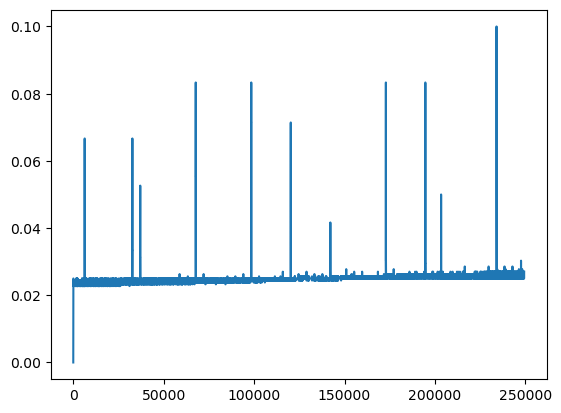

In [21]:
y2 = 'Time (s)'
y3 = 'AngleX'

arr1 = np.array(df[y2]).astype(np.double)
arr2 = np.array(df[y3]).astype(np.double)

print([arr1[0]])
print(arr1[:-1])
arr3 = np.concatenate(([arr1[0]], arr1[:-1]))
print(arr3)
print(arr1)
arr2 = arr1 - arr3

plt.plot(arr2)
# plt.xlim([6250, 6350])

                             angle
t                                 
1969-12-31 19:00:00.000000  155.50
1969-12-31 19:00:00.022727  147.44
1969-12-31 19:00:00.068182  144.56
1969-12-31 19:00:00.090909  142.63
1969-12-31 19:00:00.136364  139.69
...                            ...
1969-12-31 20:43:44.974816  350.13
1969-12-31 20:43:45.001843  352.50
1969-12-31 20:43:45.028870  352.88
1969-12-31 20:43:45.082924  353.25
1969-12-31 20:43:45.109951  353.38

[200783 rows x 1 columns]
DatetimeIndexResampler [freq=<25 * Millis>, axis=0, closed=left, label=left, convention=start, origin=start_day]
                           angle
t                               
1969-12-31 19:00:00.000  155.500
1969-12-31 19:00:00.025  152.475
1969-12-31 19:00:00.050  149.450
1969-12-31 19:00:00.075  146.425
1969-12-31 19:00:00.100  143.400
...                          ...
1969-12-31 20:43:45.000  307.000
1969-12-31 20:43:45.025  307.000
1969-12-31 20:43:45.050  307.000
1969-12-31 20:43:45.075  307.000
1969-12-3

(-18000.0, -17960.0)

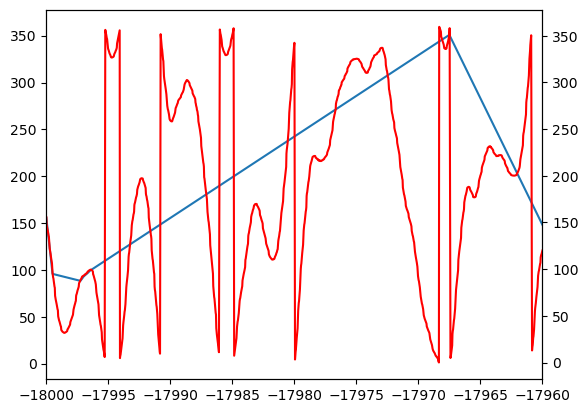

In [2]:
import io
import pandas as pd
from datetime import datetime

y2 = 'Time (s)'
y3 = 'AngleX'

arr1 = np.array(df[y2]).astype(np.double)
arr2 = np.array(df[y3]).astype(np.double)

mask = np.isfinite(arr2)
arr1 = arr1[mask]
arr2 = arr2[mask]

timearray = [datetime.fromtimestamp(a) for a in arr1]
# print(timearray[:10])
df2 = pd.DataFrame({'t': timearray, 'angle': arr2})
df2 = df2.set_index('t')
print(df2)
# pd.read_csv(data)
# print(pd.read_csv(data))
# s = pd.read_csv(data).squeeze('columns')
# print(s)
# df2.index = df2['t']
# df2.resample('ms').interpolate()
# interm = df2.resample('ms')
interm1 = df2.resample('25ms')
print(interm1)
interm2 = interm1.interpolate()
print(interm2)
# interm3 = interm2.resample('5ms')
# print(interm3)
# res = interm3.asfreq().dropna()
# print(res)
# res_t = [t.timestamp() for t in res.index]
df2_t = [t.timestamp() for t in df2.index]
interm2_t = [t.timestamp() for t in interm2.index]
print(df2_t[:5])
# print(res_t[:5])
fig, ax1 = plt.subplots()

ax1.plot(interm2_t, interm2['angle'])
ax2 = ax1.twinx()
ax2.plot(df2_t, df2['angle'], 'r')
# ax3 = ax1.twinx()
# ax3.plot(interm2_t, interm2['angle'], 'g')
plt.xlim([-18000, -17960])

                             angle
t                                 
1969-12-31 19:00:00.000000  155.50
1969-12-31 19:00:00.022727  147.44
1969-12-31 19:00:00.068182  144.56
1969-12-31 19:00:00.090909  142.63
1969-12-31 19:00:00.136364  139.69
1969-12-31 19:00:00.181818  135.69
1969-12-31 19:00:00.204545  134.69
1969-12-31 19:00:00.250000  125.25
1969-12-31 19:00:00.272727  122.00
1969-12-31 19:00:00.318182  118.69
1969-12-31 19:00:00.340909  116.44
1969-12-31 19:00:00.363636  114.19
1969-12-31 19:00:00.386364  111.87
1969-12-31 19:00:00.431818  108.44
1969-12-31 19:00:00.454545  106.12
1969-12-31 19:00:00.500000   95.75
1969-12-31 19:00:00.545455   91.25
1969-12-31 19:00:00.568182   90.12
1969-12-31 19:00:00.590909   87.87
1969-12-31 19:00:00.613636   85.69
1969-12-31 19:00:00.636364   83.44
1969-12-31 19:00:00.659091   81.25
1969-12-31 19:00:00.681818   80.12
1969-12-31 19:00:00.704545   71.56
1969-12-31 19:00:00.729545   69.50
1969-12-31 19:00:00.754545   67.50
1969-12-31 19:00:00.

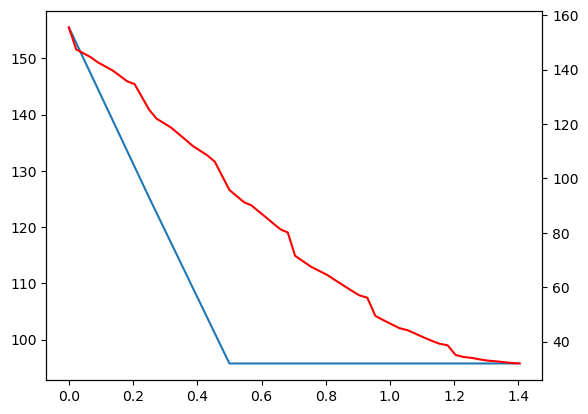

In [4]:
import io
import pandas as pd
from datetime import datetime

y2 = 'Time (s)'
y3 = 'AngleX'

arr1 = np.array(df[y2]).astype(np.double)
arr2 = np.array(df[y3]).astype(np.double)

mask = np.isfinite(arr2)
arr1 = arr1[mask][:50]
arr2 = arr2[mask][:50]

timearray = [datetime.fromtimestamp(a) for a in arr1]

df2 = pd.DataFrame({'t': timearray, 'angle': arr2})
df2 = df2.set_index('t')
print(df2)

interm1 = df2.resample('25ms')
print(interm1)
interm2 = interm1.interpolate()
print(interm2)

df2_t = [t.timestamp() + 18000 for t in df2.index]
interm2_t = [t.timestamp() + 18000 for t in interm2.index]
print(df2_t[:5])

fig, ax1 = plt.subplots()

ax1.plot(interm2_t, interm2['angle'])
ax2 = ax1.twinx()
ax2.plot(df2_t, df2['angle'], 'r')

# plt.xlim([-18000, -17960])

                         angle
t                             
1969-12-31 19:00:00.100      2
1969-12-31 19:00:00.200      6
1969-12-31 19:00:00.300      8
1969-12-31 19:00:00.400      9
1969-12-31 19:00:00.500      8
1969-12-31 19:00:00.800      5
1969-12-31 19:00:00.900      4
1969-12-31 19:00:01.000      3
1969-12-31 19:00:01.100      4
DatetimeIndexResampler [freq=<40 * Millis>, axis=0, closed=left, label=left, convention=start, origin=start_day]
                         angle
t                             
1969-12-31 19:00:00.080    NaN
1969-12-31 19:00:00.120    NaN
1969-12-31 19:00:00.160    NaN
1969-12-31 19:00:00.200    6.0
1969-12-31 19:00:00.240    6.6
1969-12-31 19:00:00.280    7.2
1969-12-31 19:00:00.320    7.8
1969-12-31 19:00:00.360    8.4
1969-12-31 19:00:00.400    9.0
1969-12-31 19:00:00.440    8.6
1969-12-31 19:00:00.480    8.2
1969-12-31 19:00:00.520    7.8
1969-12-31 19:00:00.560    7.4
1969-12-31 19:00:00.600    7.0
1969-12-31 19:00:00.640    6.6
1969-12-31 19:00:00

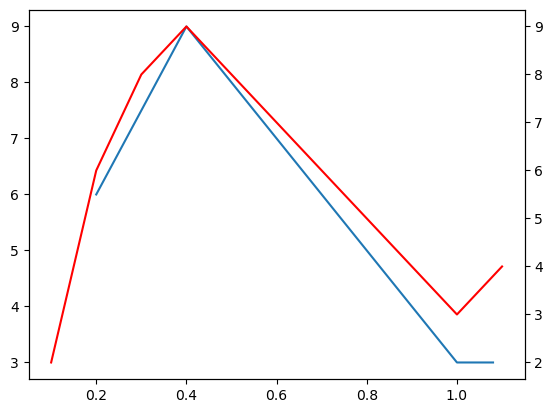

In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

arr1 = [.1,.2,.3,.4,.5,.8,.9,1.0,1.1]
arr2 = [2,6,8,9,8,5,4,3,4]

timearray = [datetime.fromtimestamp(a) for a in arr1]
df2 = pd.DataFrame({'t': timearray, 'angle': arr2})
df2 = df2.set_index('t')
print(df2)
interm1 = df2.resample('40ms')
print(interm1)
interm2 = interm1.interpolate()
print(interm2)
df2_t = [t.timestamp() + 18000 for t in df2.index]
interm2_t = [t.timestamp() + 18000 for t in interm2.index]
print(df2_t[:5])
fig, ax1 = plt.subplots()

ax1.plot(interm2_t, interm2['angle'])
ax2 = ax1.twinx()
ax2.plot(df2_t, df2['angle'], 'r')
# plt.xlim([-18000, -17985])

(-8.0, 8.0)

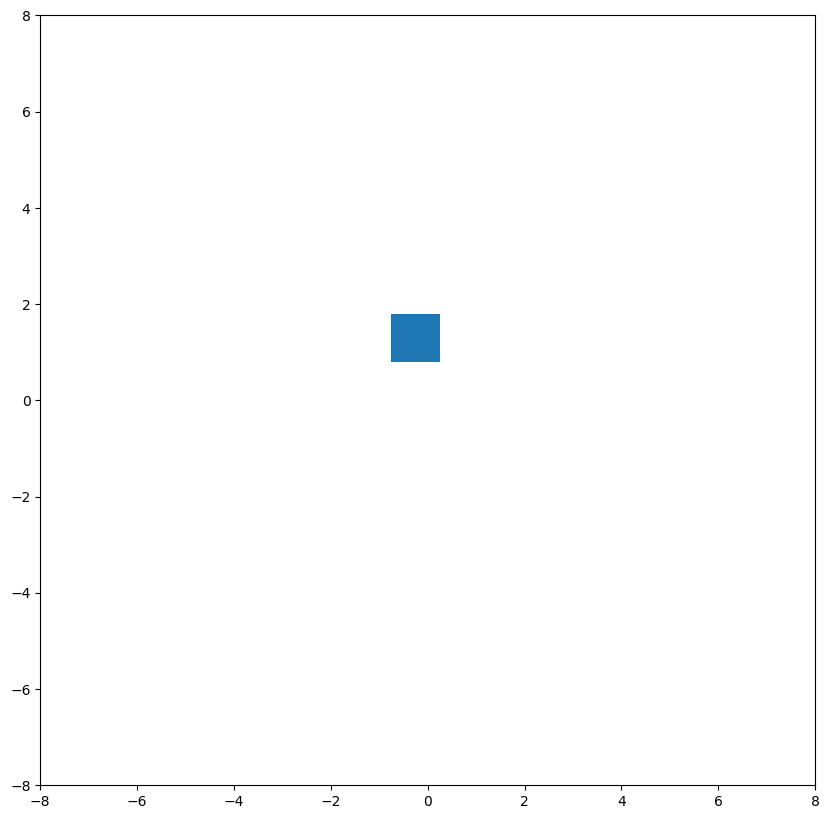

In [3]:

from matplotlib.patches import Rectangle

box_width = 1
fig,ax = plt.subplots()
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((y[2] - box_width/2, z[2] - box_width/2), box_width, box_width))

currentAxis.set_ylim(-8, 8)
currentAxis.set_xlim(-8, 8)

In [32]:
t

0            0.000000
1            0.022727
3            0.068182
4            0.090909
6            0.136364
             ...     
249360    6224.974816
249361    6225.001843
249362    6225.028870
249364    6225.082924
249365    6225.109951
Name: Time (s), Length: 198872, dtype: float64

0.0


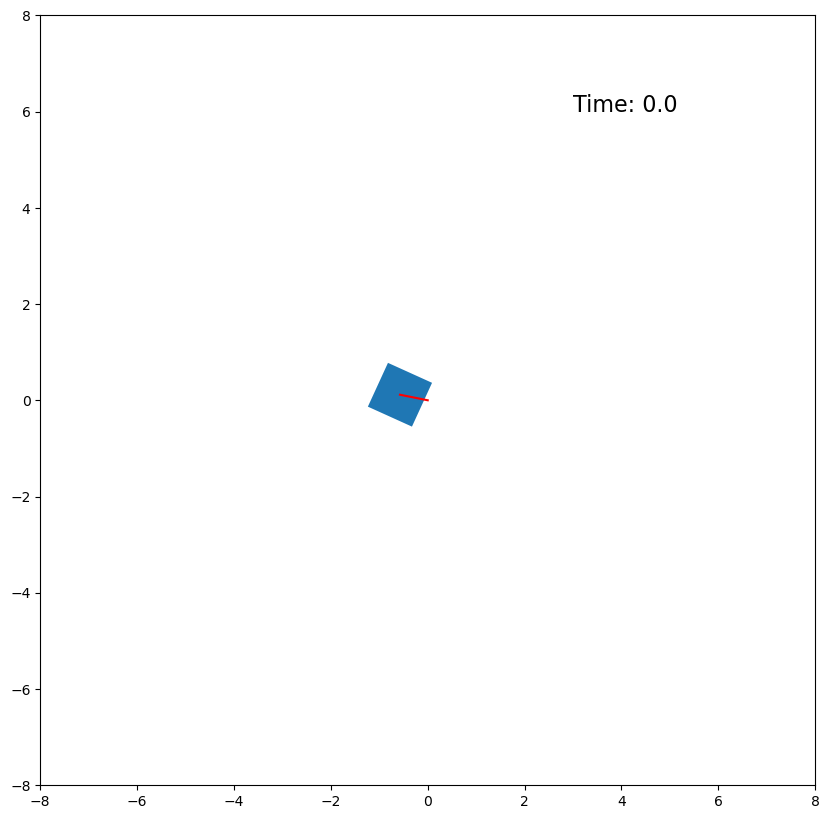

In [45]:
%matplotlib inline
plt.rcParams["animation.html"] = "html5"
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import time

box_width = 1
plot_width = 8
fig,ax = plt.subplots()
currentAxis = plt.gca()

anglex_ = np.array(anglex)
t_ = np.array(t)
    
def animate(i):
    multiple = 1
    x_coord = y[i*multiple]
    y_coord = z[i*multiple]
    angle = anglex_[i*multiple]*180/np.pi
    time = t_[i*multiple]
    currentAxis.clear()
    currentAxis.set_ylim(-plot_width, plot_width)
    currentAxis.set_xlim(-plot_width, plot_width)
    currentAxis.add_patch(Rectangle((x_coord - box_width/2, y_coord - box_width/2), box_width, box_width,
                                    angle=angle, rotation_point='center'))
    currentAxis.text(3,6, 'Time: ' + str(round(time,2)), fontsize = 16)
    plt.plot([0, x_coord], [0, y_coord], 'r')
#     plt.close()
    
t1 = time.time()
ani = FuncAnimation(fig, animate, frames=400, interval=50)
print(time.time()-t1)
ani

In [18]:
import copy
x = 'Time (s)'
y1 = 'Tension (N)'
y2 = 'AngleX'
y3 = 'AngleY'
y4 = 'AngleZ'

arr = np.array(df[y2]).astype(np.double)
y2mask = np.isfinite(arr)
arr = np.array(df[y3]).astype(np.double)
y3mask = np.isfinite(arr)
arr = np.array(df[y4]).astype(np.double)
y4mask = np.isfinite(arr)

anglex_corr = df[y2][y2mask].reset_index(drop=True)
print(anglex_corr)
for i,a in enumerate(anglex_corr):
    if i+1 < len(anglex_corr):
        if a-anglex_corr[i+1] > 300:
            anglex_corr[i+1:] = np.add([360]*len(anglex_corr[i+1:]), anglex_corr[i+1:])
        elif a-anglex_corr[i+1] < -300:
            anglex_corr[i+1:] = np.add([-360]*len(anglex_corr[i+1:]), anglex_corr[i+1:])

angley_corr = df[y3][y3mask].reset_index(drop=True)
print(angley_corr)
for i,a in enumerate(angley_corr):
    if i+1 < len(angley_corr):
        if a-angley_corr[i+1] > 300:
            angley_corr[i+1:] = np.add([360]*len(angley_corr[i+1:]), angley_corr[i+1:])
        elif a-angley_corr[i+1] < -300:
            angley_corr[i+1:] = np.add([-360]*len(angley_corr[i+1:]), angley_corr[i+1:])

anglez_corr = df[y4][y4mask].reset_index(drop=True)
print(anglez_corr)
for i,a in enumerate(anglez_corr):
    if i+1 < len(anglez_corr):
        if a-anglez_corr[i+1] > 300:
            anglez_corr[i+1:] = np.add([360]*len(anglez_corr[i+1:]), anglez_corr[i+1:])
        elif a-anglez_corr[i+1] < -300:
            anglez_corr[i+1:] = np.add([-360]*len(anglez_corr[i+1:]), anglez_corr[i+1:])
        
# yseries

0         155.50
1         147.44
2         144.56
3         142.63
4         139.69
           ...  
200778    350.13
200779    352.50
200780    352.88
200781    353.25
200782    353.38
Name: AngleX, Length: 200783, dtype: float64
0         -2.19
1         -2.00
2         -2.00
3         -1.88
4         -1.81
          ...  
198909   -20.50
198910   -22.44
198911   -22.69
198912   -23.06
198913   -23.12
Name: AngleY, Length: 198914, dtype: float64
0        -179.56
1        -179.31
2        -179.50
3        -179.50
4        -179.50
           ...  
198909    176.63
198910   -179.94
198911   -179.63
198912   -179.31
198913   -179.25
Name: AngleZ, Length: 198914, dtype: float64


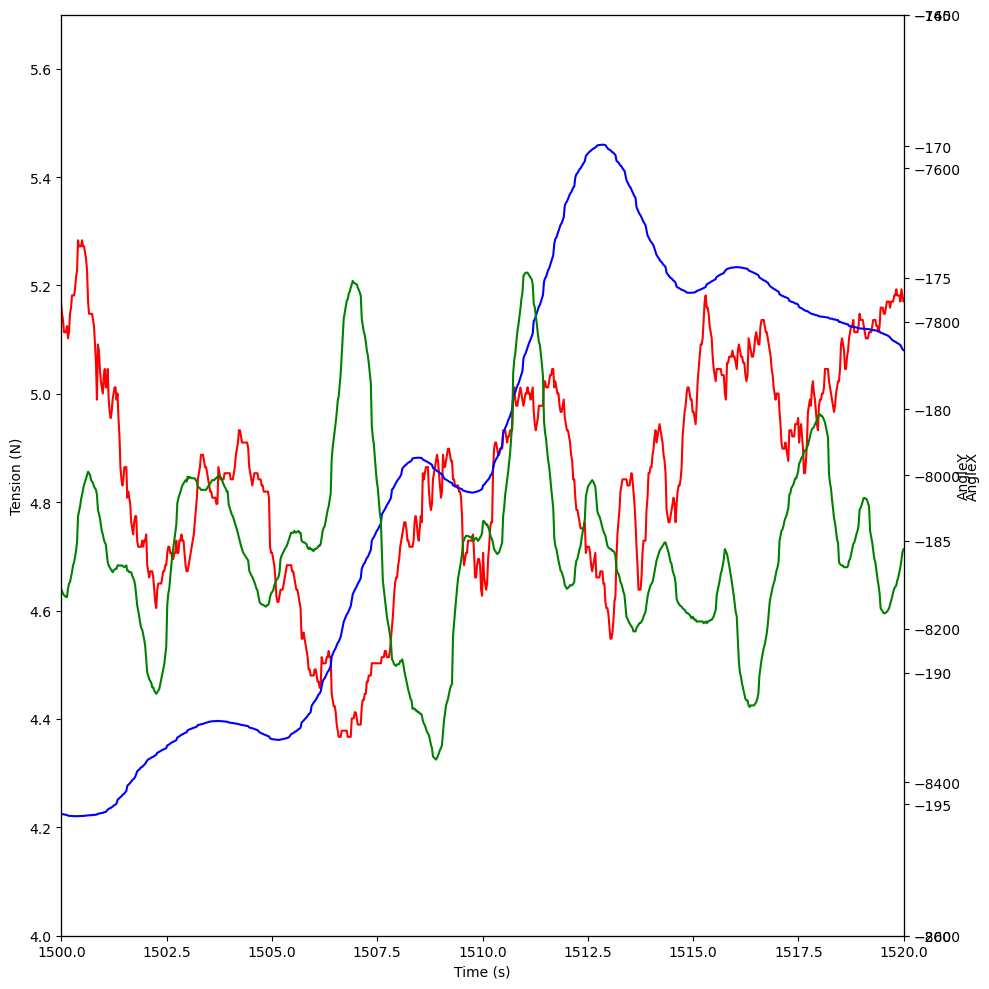

In [45]:
anglex = df[y2][y2mask].reset_index(drop=True)
angley = df[y3][y3mask].reset_index(drop=True)
anglez = df[y4][y4mask].reset_index(drop=True)

arr = np.array(df[y1]).astype(np.double)
y1mask = np.isfinite(arr)

plt.rcParams['figure.figsize'] = (10,10)

# fig, axs = plt.subplots(3, 1, sharex=True)

fig, ax1 = plt.subplots()
ax1.plot(df[x][y1mask], df[y1][y1mask], 'r')
ax1.set_xlabel(x)
ax1.set_ylabel(y1)
# ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df[x][y2mask], anglex_corr, 'b')
ax2.set_ylabel(y2)
# ax2.tick_params(y2)

ax3 = ax1.twinx()
ax3.plot(df[x][y3mask], angley_corr+anglez_corr, 'g')
ax3.set_ylabel(y3)

# ax3 = ax1.twinx()
# ax3.plot(df[x][y3mask], angley_corr, 'g')
# ax3.set_ylabel(y3)

# ax4 = ax1.twinx()
# ax4.plot(df[x][y4mask], anglez_corr, 'y')
# ax4.set_ylabel(y4)

# axs[2] = axs[0].twinx()
# axs[2].plot(df[x][y2mask], yseries)
# axs[2].set_ylabel(y2)

plt.xlim([1500, 1520])
ax1.set_ylim(4, 5.7)
ax2.set_ylim(-8600, -7400)
ax3.set_ylim(-200, -165)
# ax3.set_ylim(-20, 20)
# ax4.set_ylim(-200, -160)

fig.tight_layout()
plt.show()

In [2]:
from visual import *
scene.title = "VPython: Draw a rotating cube"

scene.range = 2
scene.autocenter = True

print("Drag with right mousebutton to rotate view.")
print("Drag up+down with middle mousebutton to zoom.")

deg45 = math.radians(45.0)  # 0.785398163397

cube = box()    # using defaults, see http://www.vpython.org/contents/docs/defaults.html 
cube.rotate( angle=deg45, axis=(1,0,0) )
cube.rotate( angle=deg45, axis=(0,0,1) )

while True:                 # Animation-loop
    rate(50)
    cube.rotate( angle=0.005, axis=(0,1,0) )

ModuleNotFoundError: No module named 'visual'

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some example data and plot a basic wireframe.
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Set the axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Rotate the axes and update
for angle in range(0, 360*4 + 1):
    # Normalize the angle to the range [-180, 180] for display
    angle_norm = (angle + 180) % 360 - 180

    # Cycle through a full rotation of elevation, then azimuth, roll, and all
    elev = azim = roll = 0
    if angle <= 360:
        elev = angle_norm
    elif angle <= 360*2:
        azim = angle_norm
    elif angle <= 360*3:
        roll = angle_norm
    else:
        elev = azim = roll = angle_norm

    # Update the axis view and title
    ax.view_init(elev, azim, roll)
    plt.title('Elevation: %d°, Azimuth: %d°, Roll: %d°' % (elev, azim, roll))

    plt.draw()
    plt.pause(.001)

C:\Users\aspen\AppData\Local\Temp\ipykernel_33144\822444207.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(axes, dtype=np.bool)


[[[ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]]

 [[ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]]

 [[ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]]

 [[ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]]

 [[ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]
  [ True  True  True  True  True]]]


{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee6079a320>,
 (0, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2e890>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2e860>,
 (0, 1, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2ecb0>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2d750>,
 (0, 2, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2d210>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2dd80>,
 (0, 3, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2dea0>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2f520>,
 (0, 4, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2e110>,
 (1, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2d9f0>,
 (1, 0, 4): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2c1c0>,
 (1, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1ee5ec2dc30>,
 (1, 1, 4): 

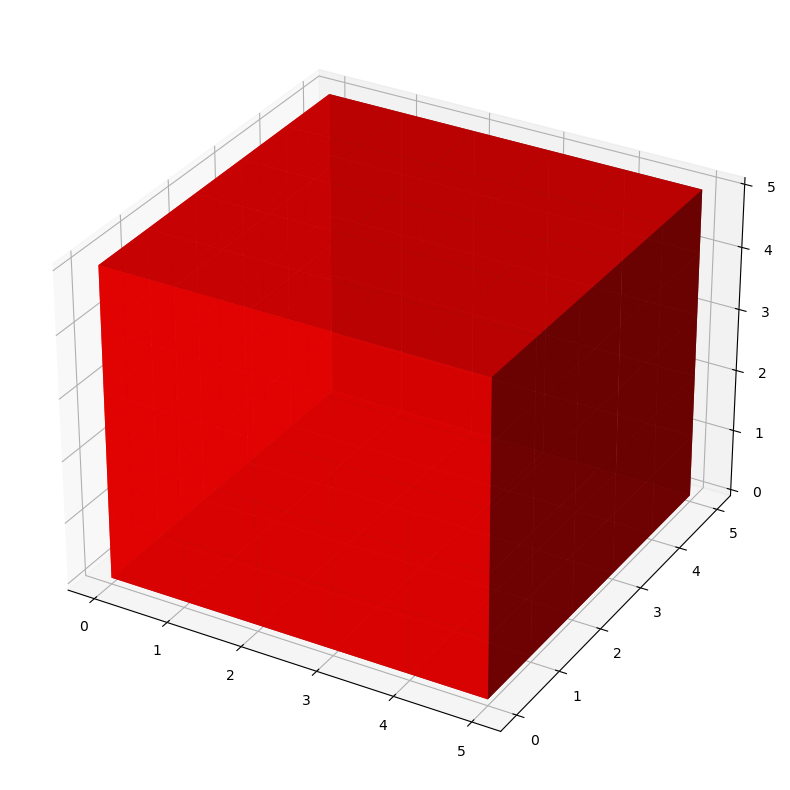

In [47]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
 
 
# Create axis
axes = [5, 5, 5]
 
# Create Data
data = np.ones(axes, dtype=np.bool)
print(data)
 
# Control Transparency
alpha = 0.9
 
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
 
colors[:] = [1, 0, 0, alpha]  # red
 
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)

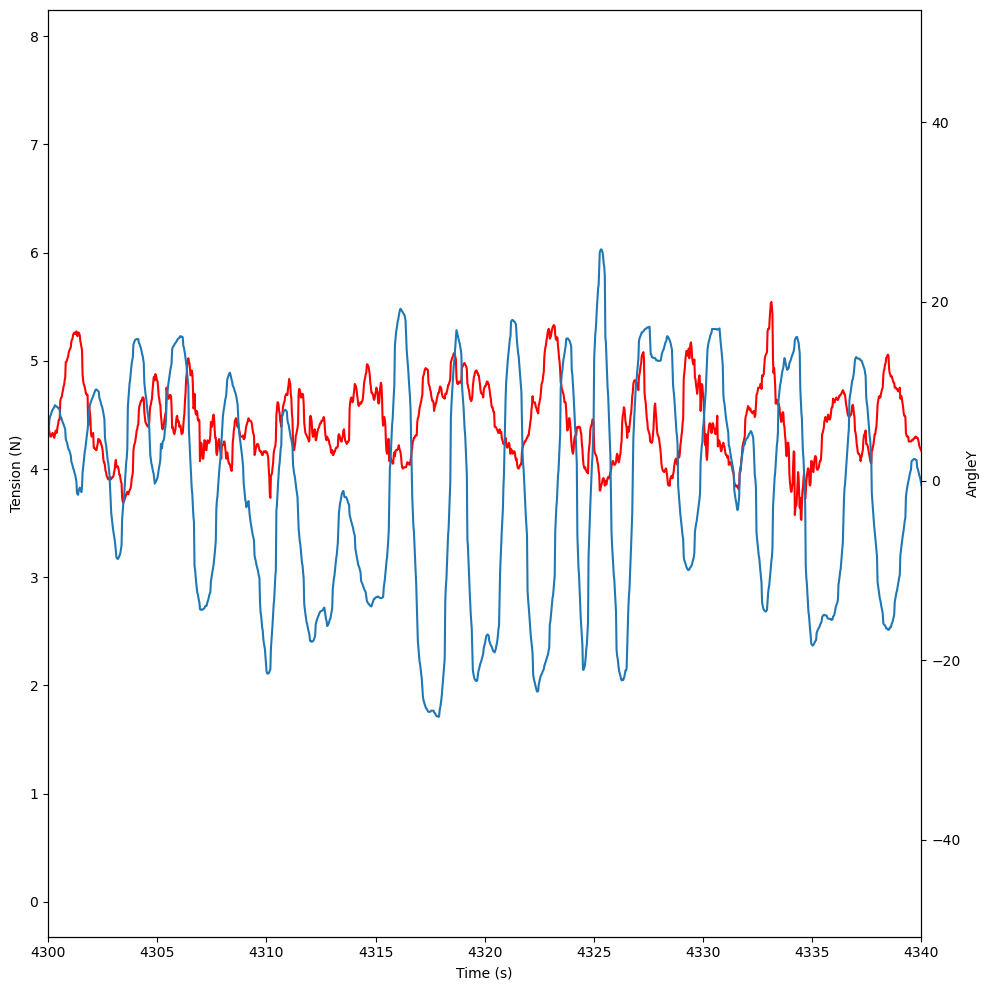

In [22]:
anglex = df[y2][y2mask].reset_index(drop=True)
plt.rcParams['figure.figsize'] = (10,10)

fig, ax1 = plt.subplots()
ax1.plot(df[x], df[y1], 'r')
ax1.set_xlabel(x)
ax1.set_ylabel(y1)
# ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(df[x][y3mask], angley_corr)
ax2.set_ylabel(y3)
# ax2.tick_params(y2)

ax3 = ax1.twinx()
ax3.plot(df[x][y3mask], angley, 'm')
ax3.set_ylabel(y3)
# axs[2].set_ylabel(y2)

plt.xlim([4300, 4340])
# ax1.set_ylim(2, 7)
# ax2.set_ylim(21000, 24000)
# axs[2].set_ylim(21000, 24000)

fig.tight_layout()
plt.show()

In [3]:
yseries = [3,2,1,355,353,350,347]
print(yseries)
# print(len(yseries))
# print(enumerate(yseries))
offset = 0
for i,a in enumerate(yseries):
    print('_________')
    print(i)
    print(a)
    if i+1 < len(yseries):
        print(yseries[i+1])
        if a-yseries[i+1] > 300:
            offset += 360
            yseries[i+1:] = np.add([offset]*len(yseries[i+1:]), yseries[i+1:])
        elif a-yseries[i+1] < -300:
            offset -= 360
            yseries[i+1:] = np.add([offset]*len(yseries[i+1:]), yseries[i+1:])
        print(yseries[i+1:])
       
yseries

[3, 2, 1, 355, 353, 350, 347]
_________
0
3
2
[2, 1, 355, 353, 350, 347]
_________
1
2
1
[1, 355, 353, 350, 347]
_________
2
1
355
[-5, -7, -10, -13]
_________
3
-5
-7
[-7, -10, -13]
_________
4
-7
-10
[-10, -13]
_________
5
-10
-13
[-13]
_________
6
-13


[3, 2, 1, -5, -7, -10, -13]

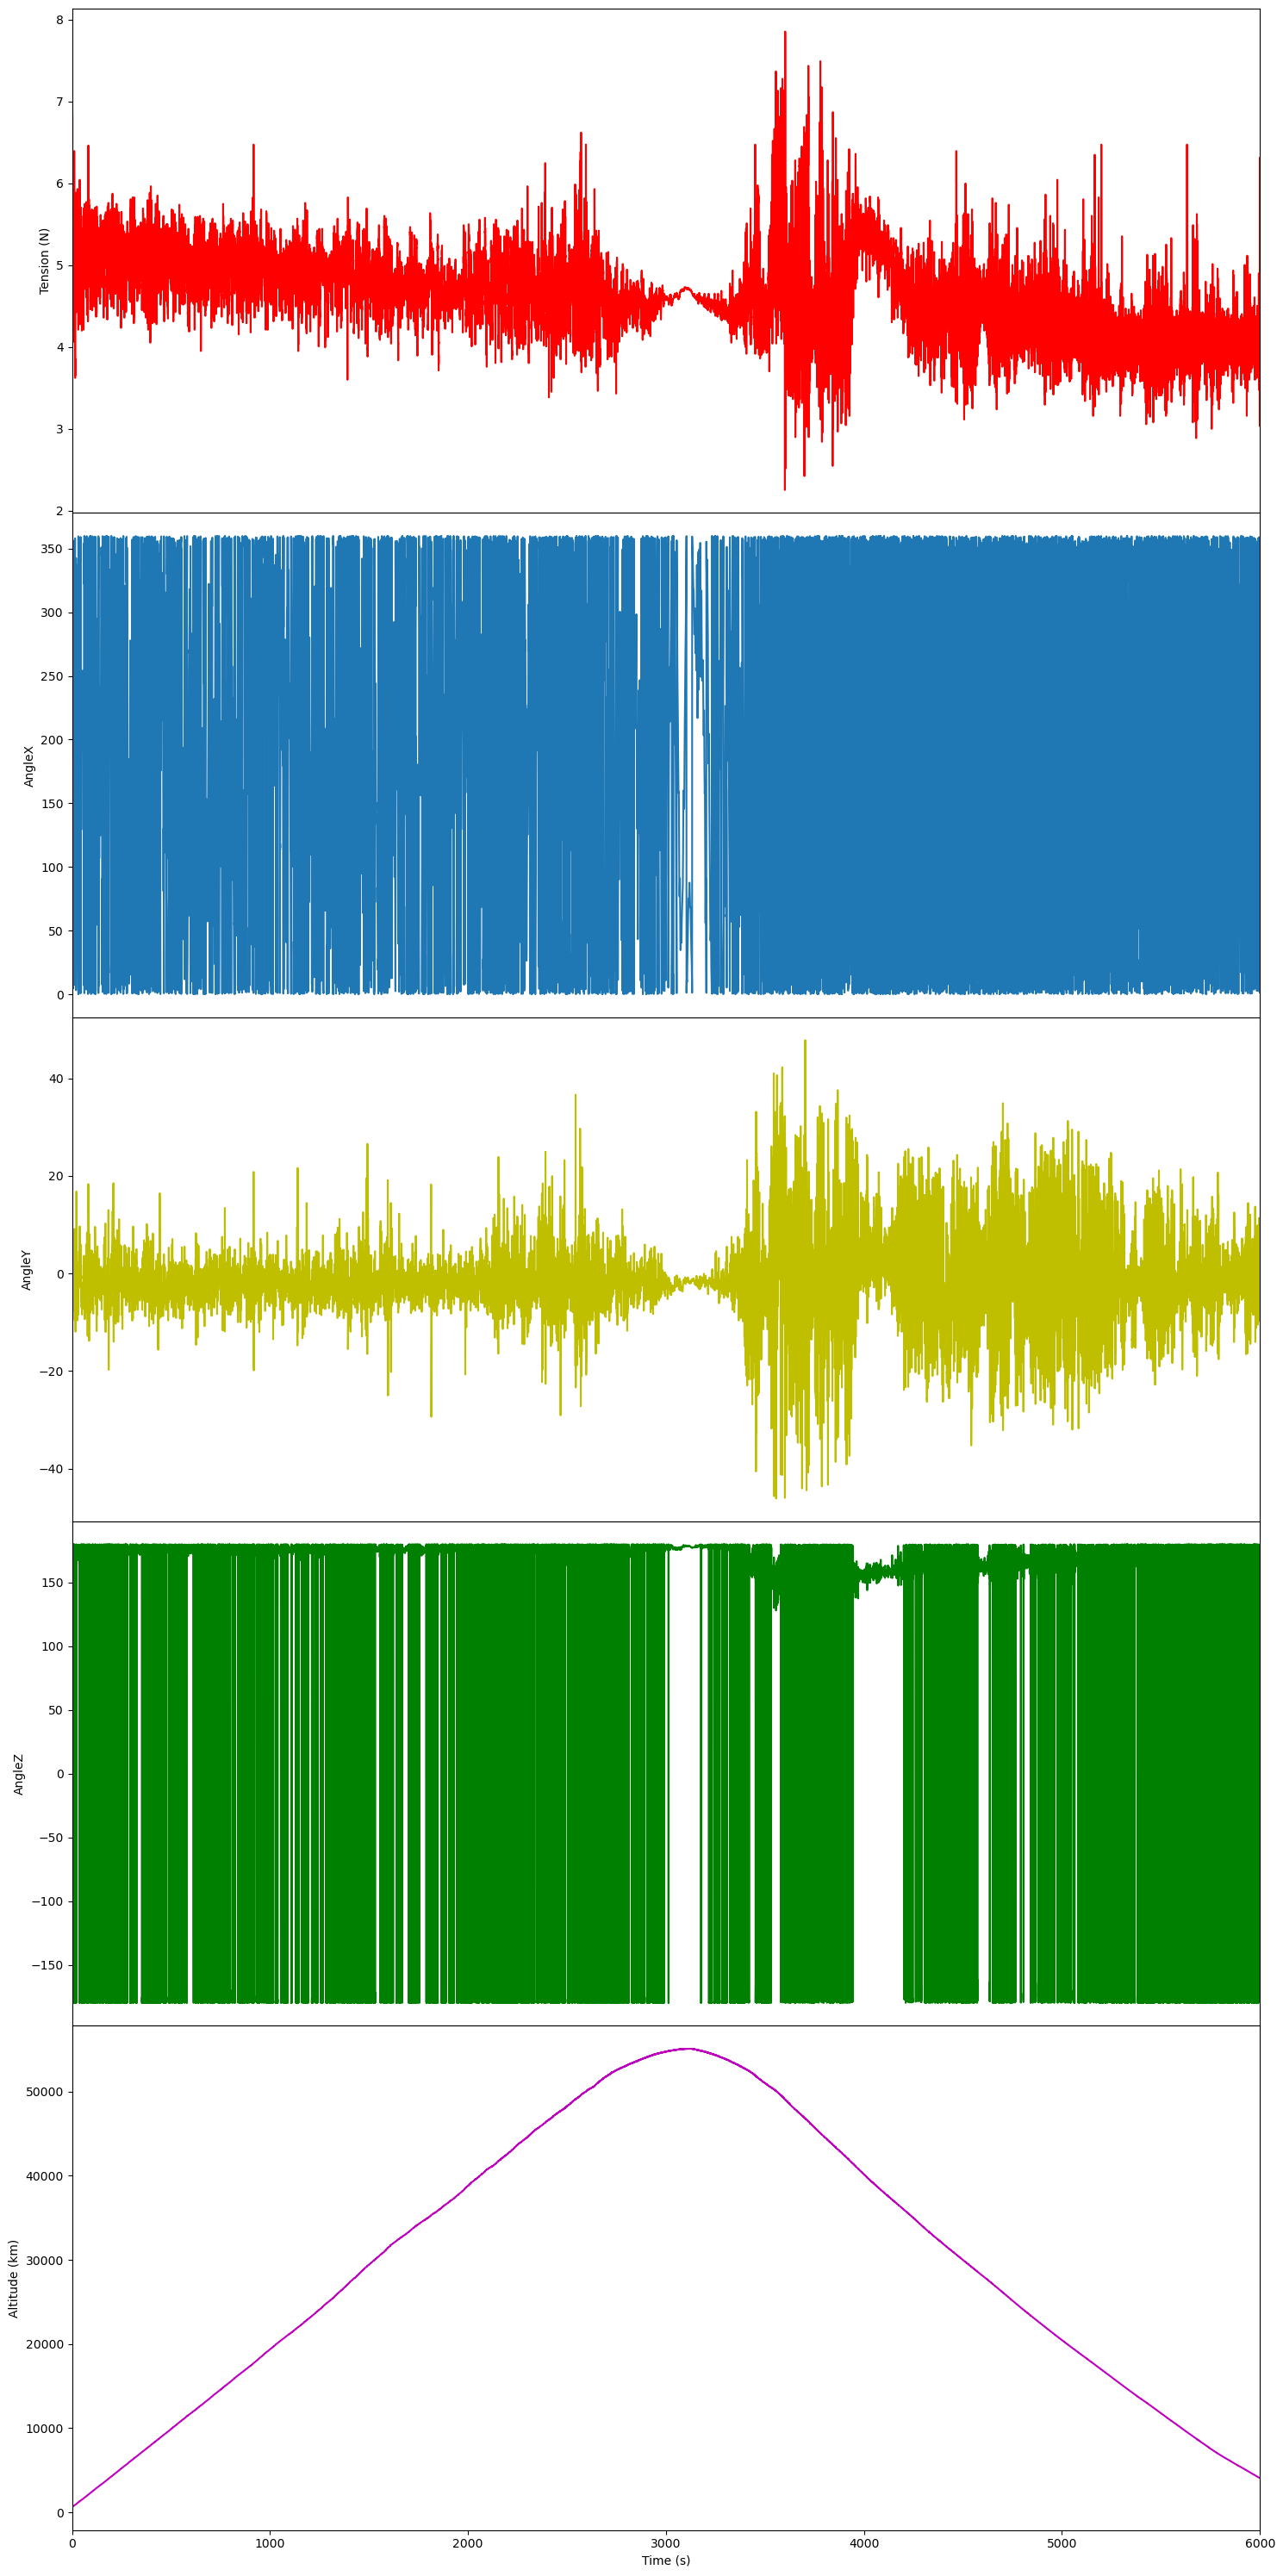

In [5]:
x = 'Time (s)'
y1 = 'Tension (N)'
y2 = 'AngleX'
y3 = 'AngleY'
y4 = 'AngleZ'
y5 = 'Altitude (km)'
# y6 = 'Pressure (hPa)'

xmin = 0
xmax = 6000

mask = (df['Time (s)'] >= xmin) & (df['Time (s)'] <= xmax)
x_subset = df[x][mask]
# print(x_subset)
y1_subset = df[y1][mask]
y2_subset = df[y2][mask]
y3_subset = df[y3][mask]
y4_subset = df[y4][mask]
y5_subset = df[y5][mask]
# y6_subset = df[y6][mask]

arr = np.array(y2_subset).astype(np.double)
y2mask = np.isfinite(arr)

arr = np.array(y3_subset).astype(np.double)
y3mask = np.isfinite(arr)

arr = np.array(y4_subset).astype(np.double)
y4mask = np.isfinite(arr)

arr = np.array(y1_subset).astype(np.double)
tmask = arr > 0

plt.rcParams['figure.figsize'] = (15,30)

# plt.scatter(df[x], df[y]/100, c=df['Tm']) # x, y
# plt.plot(df[x], df[y]/100) # x, y
# plt.rcParams['figure.figsize'] = (10,10)
# plt.ylabel(y)
# plt.xlabel(x)
# plt.xlim([5100, 5200])
# plt.gca().invert_yaxis()
# plt.show()

fig, axs = plt.subplots(5, 1, sharex=True)
axs[0].plot(x_subset[tmask], y1_subset[tmask], 'r')
# axs[0].set_xlabel(x)
axs[0].set_ylabel(y1)
# ax1.tick_params('y', colors='b')

# axs[1] = ax1.twinx()
axs[1].plot(x_subset[y2mask], y2_subset[y2mask])
axs[1].set_ylabel(y2)

axs[2].plot(x_subset[y3mask], y3_subset[y3mask], 'y')
axs[2].set_ylabel(y3)

axs[3].plot(x_subset[y4mask], y4_subset[y4mask], 'g')
axs[3].set_ylabel(y4)

axs[4].plot(x_subset, y5_subset, 'm')
axs[4].set_ylabel(y5)

# axs[5].plot(x_subset, y6_subset, 'c')
# axs[5].set_ylabel(y6)

axs[-1].set_xlabel(x)

axs[0].set_xlim(xmin, xmax)
# axs[0].set_ylim(0, 15)
# axs[1].set_ylim(10, 60)
# axs[2].set_ylim(4.4, 4.6)
# axs[3].set_ylim(15000, 16000)

fig.tight_layout()
plt.subplots_adjust(hspace=.0)
plt.show()

In [8]:
min(df['Tension (N)'])

-2.97

In [1]:
x = 'Tm'
y = 'z'
plt.plot(df[x], df[y]/100, 
#          c=df['Tm']
        ) # x, y
plt.rcParams['figure.figsize'] = (10,10)
plt.ylabel(y)
plt.xlabel(x)
# plt.xlim([3188, 3195])
# plt.ylim([54, 54.5])
# plt.gca().invert_yaxis()
plt.show()

NameError: name 'plt' is not defined

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Define constant file name
OG_DATA_LOG = 'ns112/DATALOG.TXT'

# Put datalog data into a "CSV" file (spreadsheet)
headers = ['Time', 'Tension', 'Temperature', 'Pressure', 'Altitude', 'AngleX', 
           'AngleY', 'AngleZ', 'AccelerationX', 'AccelerationY', 
           'AccelerationZ', 'MagnometerX', 'MagnometerY', 'MagnometerZ','dud']
df = pd.read_csv(OG_DATA_LOG, names=headers, index_col=False)
df

,Time,Tension,Temperature,Pressure,Altitude,AngleX,AngleY,AngleZ,AccelerationX,AccelerationY,AccelerationZ,MagnometerX,MagnometerY,MagnometerZ,dud
0,2022/10/16|8:37:3,0.05,9.37,99780.64,162.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/10/16|8:37:3,0.05,9.42,99778.66,162.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/10/16|8:37:3,0.05,9.42,99778.66,162.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022/10/16|8:37:3,0.05,9.42,99778.66,163.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/10/16|8:37:3,0.05,9.45,99778.85,162.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697865,2022/10/16|13:41:55,-0.38,28.55,98830.50,242.85,198.00,-50.38,17.75,-7.49,-2.07,6.18,47.00,-30.06,-27.56,NaN
697866,2022/10/16|13:41:55,-0.37,28.55,98826.21,243.22,197.63,-50.44,17.44,-7.85,-1.68,5.96,47.00,-30.06,-27.56,NaN
697867,2022/10/16|13:41:55,-0.37,28.55,98826.21,243.22,197.25,-50.50,17.12,-7.75,-1.48,5.76,46.69,-30.06,-28.75,NaN
697868,2022/10/16|13:41:55,-0.37,28.55,98826.21,243.22,197.13,-50.50,17.00,-7.82,-1.55,5.87,46.69,-30.06,-28.75,NaN


In [5]:
df

,Unnamed: 0,Time (s),Tension (N),Temperature (C),Pressure (hPa),Altitude (km),AngleX,AngleY,AngleZ,ax,ay,az,mx,my,mz,Average_tension,Drag
0,93541,0.000000,10.07,37.98,1003.7121,112.88,225.13,-2.69,-178.50,-0.09,-0.30,-12.56,-16.37,-18.56,52.19,NaN,4.85
1,93542,0.027027,10.16,37.98,1003.7121,112.88,224.94,-2.63,-178.44,-0.06,-0.01,-11.89,-17.19,-19.00,51.69,NaN,4.94
2,93543,0.054054,9.67,37.98,1003.7121,112.88,NaN,NaN,NaN,NaN,NaN,NaN,-17.19,-19.00,51.69,NaN,4.45
3,93544,0.081081,8.26,37.97,1003.7477,112.58,224.50,-2.63,-178.31,-0.25,0.51,-15.49,-16.37,-18.56,50.88,NaN,3.04
4,93545,0.108108,7.46,37.97,1003.7477,112.58,224.31,-2.69,-178.63,-0.22,-0.03,-13.58,-16.37,-18.56,50.88,NaN,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193594,287135,6329.610565,0.62,6.28,996.4778,173.71,NaN,NaN,NaN,5.16,14.63,-39.02,17.37,-21.87,48.50,4.98306,4.60
193595,287136,6329.656020,0.77,6.27,996.5397,173.19,53.44,-10.88,-145.13,-1.77,12.87,-35.84,17.37,-21.87,48.50,4.97312,4.45
193596,287137,6329.701474,0.72,6.27,996.5397,173.19,45.38,-16.25,-149.81,-1.91,5.33,-21.32,21.75,-28.56,44.19,4.96356,4.50
193597,287138,6329.746929,0.36,6.27,996.5397,173.19,37.56,-20.19,-157.19,-1.71,3.59,-11.97,0.00,0.00,NaN,4.95344,4.86


In [20]:
'''
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
    filter_by_keys={'typeOfLevel': 'atmosphere'}
    filter_by_keys={'typeOfLevel': 'cloudTop'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'isothermal'}
    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigmaLayer'}
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigma'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'depthBelowLand'}
    filter_by_keys={'typeOfLevel': 'isobaricLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'cloudCeiling'}
    filter_by_keys={'typeOfLevel': 'cloudBase'}
    filter_by_keys={'typeOfLevel': 'nominalTop'}
    filter_by_keys={'typeOfLevel': 'isothermZero'}
    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}
    filter_by_keys={'typeOfLevel': 'adiabaticCondensation'}
    filter_by_keys={'typeOfLevel': 'equilibrium'}
    filter_by_keys={'typeOfLevel': 'unknown'}
'''

import xarray as xr
import cfgrib
ds = xr.open_dataset('hrrr.t12z.wrfprsf00.grib2', engine='cfgrib',
#                      filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
                    )
ds

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
    filter_by_keys={'typeOfLevel': 'atmosphere'}
    filter_by_keys={'typeOfLevel': 'cloudTop'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'isothermal'}
    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigmaLayer'}
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigma'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'depthBelowLand'}
    filter_by_keys={'typeOfLevel': 'isobaricLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'cloudCeiling'}
    filter_by_keys={'typeOfLevel': 'cloudBase'}
    filter_by_keys={'typeOfLevel': 'nominalTop'}
    filter_by_keys={'typeOfLevel': 'isothermZero'}
    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}
    filter_by_keys={'typeOfLevel': 'adiabaticCondensation'}
    filter_by_keys={'typeOfLevel': 'equilibrium'}
    filter_by_keys={'typeOfLevel': 'unknown'}

In [15]:
ds.gh[0]

<xarray.DataArray 'gh' (y: 1059, x: 1799)>
[1905141 values with dtype=float32]
Coordinates:
    time           datetime64[ns] 2022-07-31T12:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 1.013e+03
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] 2022-07-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    GRIB_paramId:                             156
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            lambert
    GRIB_DxInMetres:                          3000.0
    GRIB_DyInMetres:                          3000.0
    GRIB_LaDInDegrees:                        38.5
    GRIB_Latin1InDegrees:                     38.5
    GRIB_Latin2InDegrees:                     38.5
    GRIB_LoVInDegrees:                        262.5
    GRIB_NV:                                  0
    GRIB_Nx:                                  1799
    GRIB_Ny:                                  1059
    GRIB_cfName:                              geopotential_height
    GRIB_cfVarName:                           gh
    GRIB_gridDefinitionDescription:           Lambert Conformal can be secant...
    GRIB_iScansNegatively:                    0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   21.138123
    GRIB_latitudeOfSouthernPoleInDegrees:     0.0
    GRIB_longitudeOfFirstGridPointInDegrees:  237.280472
    GRIB_longitudeOfSouthernPoleInDegrees:    0.0
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Geopotential height
    GRIB_shortName:                           gh
    GRIB_units:                               gpm
    long_name:                                Geopotential height
    units:                                    gpm
    standard_name:                            geopotential_height

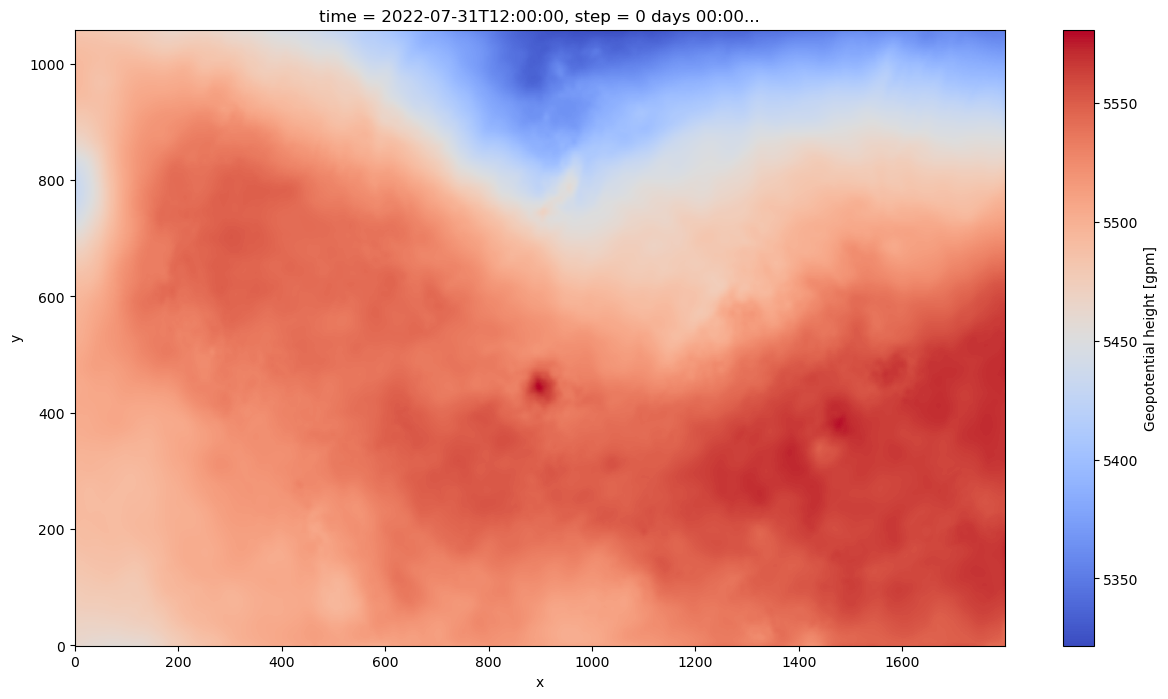

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

ds.gh[20].plot(cmap=plt.cm.coolwarm)

# fig = plt.figure(figsize=(15, 8))
# ax = plt.axes(projection=ccrs.Robinson())
# print('a')
# ax.coastlines(resolution="110m")
# print('b')
# plot = ds.t[0].plot(
#     cmap=plt.cm.coolwarm,
#     transform=ccrs.PlateCarree(),
# #     cbar_kwargs={"shrink": 0.6}
# )

plt.rcParams['figure.figsize'] = (15,8)

In [18]:
ds.t[1]

<xarray.DataArray 't' (y: 1059, x: 1799)>
[1905141 values with dtype=float32]
Coordinates:
    time           datetime64[ns] 2022-07-31T12:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 1e+03
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] 2022-07-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1905141
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            lambert
    GRIB_DxInMetres:                          3000.0
    GRIB_DyInMetres:                          3000.0
    GRIB_LaDInDegrees:                        38.5
    GRIB_Latin1InDegrees:                     38.5
    GRIB_Latin2InDegrees:                     38.5
    GRIB_LoVInDegrees:                        262.5
    GRIB_NV:                                  0
    GRIB_Nx:                                  1799
    GRIB_Ny:                                  1059
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t
    GRIB_gridDefinitionDescription:           Lambert Conformal can be secant...
    GRIB_iScansNegatively:                    0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   21.138123
    GRIB_latitudeOfSouthernPoleInDegrees:     0.0
    GRIB_longitudeOfFirstGridPointInDegrees:  237.280472
    GRIB_longitudeOfSouthernPoleInDegrees:    0.0
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature